In [3]:
import pandas as pd
import matplotlib.pyplot as plt

This is the Proof of Concept Notebook to demonstrate what information can potentially be gained from aggregating and querying blogs for valuable research content 

In [4]:
df = pd.read_json('../data/batch.json')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _id             12 non-null     int64  
 1   title           12 non-null     object 
 2   author          11 non-null     object 
 3   date_published  12 non-null     int64  
 4   dek             0 non-null      float64
 5   lead_image_url  11 non-null     object 
 6   content         12 non-null     object 
 7   next_page_url   0 non-null      float64
 8   url             12 non-null     object 
 9   domain          12 non-null     object 
 10  excerpt         12 non-null     object 
 11  word_count      12 non-null     int64  
 12  direction       12 non-null     object 
 13  total_pages     12 non-null     int64  
 14  rendered_pages  12 non-null     int64  
 15  keywords        12 non-null     object 
dtypes: float64(2), int64(5), object(9)
memory usage: 1.6+ KB


In [5]:
# this is just the basic data that we have in from the stream
df.head()

,_id,title,author,date_published,dek,lead_image_url,content,next_page_url,url,domain,excerpt,word_count,direction,total_pages,rendered_pages,keywords
0,1,Application Performance Monitoring AWS Lambda ...,Matt Makai,2021,NaN,https://www.fullstackpython.com/img/headers/py...,\nAmazon Web Services (AWS) Lambda is a usage-...,NaN,https://www.fullstackpython.com/blog/applicati...,fullstackpython,Learn how to use Sentry Application Performanc...,1113,ltr,1,1,"[python, lambda]"
1,2,Asynchronous Web Scraping With Python AIOHTTP,Ronnie Atuhaire,2022,NaN,https://hashnode.com/utility/r?url=https%3A%2F...,"Hey there 👋, welcome here! Having looked at As...",NaN,https://blog.octachart.com/asynchronous-web-sc...,blog.octachart.com,"Hey there 👋, welcome here! Having looked at As...",671,ltr,1,1,"[python, scraping]"
2,3,Automating Excel with Python Video Overview - ...,Not found,2022,NaN,None,"In this tutorial, I will show you an overview ...",NaN,https://www.blog.pythonlibrary.org/2022/03/29/...,www.blog.pythonlibrary.org,"In this tutorial, I will show you an overview ...",67,ltr,1,1,"[python, openPyxl]"
3,4,Best 15+ Machine Learning Cheat Sheets to Pin ...,Chris,2020,NaN,https://blog.finxter.com/wp-content/uploads/20...,\nThis article compiles for you the 15 best ch...,NaN,https://blog.finxter.com/machine-learning-chea...,blog.finxter.com,This article compiles for you the 15 best chea...,2907,ltr,1,1,"[python, machine learning]"
4,5,Getting started with PYTHON!!! #2.2 - Escape S...,None,2021,NaN,https://hashnode.com/utility/r?url=https%3A%2F...,Soham Sarkar\n\n\nWhat escape sequence actuall...,NaN,https://sohoxic.hashnode.dev/getting-started-w...,hashnode,"Hello People, In this blog we'll talk about Wh...",2,ltr,1,1,"[python, escape sequence]"


In [6]:
# we can easily count up the values of say, a given domain
df['domain'].value_counts()

hashnode                      6
fullstackpython               3
blog.octachart.com            1
www.blog.pythonlibrary.org    1
blog.finxter.com              1
Name: domain, dtype: int64

In [9]:
# this code is to flatten out the keywords from a list, which leads to duplications within the rest of the columns
# would need to ensure that any data gathering from this new variable is explicitly in relation to the flattened keywords list, to avoid mistakes
flatdata = pd.DataFrame([( index, value) for ( index, values)
                         in df[ 'keywords' ].iteritems() for value in values],
                             columns = [ 'index', 'keywords']).set_index( 'index' )
  
# flatdata.head()
flattenedData = df.drop( 'keywords', axis = 1 ).join( flatdata )
flattenedData.head()

,_id,title,author,date_published,dek,lead_image_url,content,next_page_url,url,domain,excerpt,word_count,direction,total_pages,rendered_pages,keywords
0,1,Application Performance Monitoring AWS Lambda ...,Matt Makai,2021,NaN,https://www.fullstackpython.com/img/headers/py...,\nAmazon Web Services (AWS) Lambda is a usage-...,NaN,https://www.fullstackpython.com/blog/applicati...,fullstackpython,Learn how to use Sentry Application Performanc...,1113,ltr,1,1,python
0,1,Application Performance Monitoring AWS Lambda ...,Matt Makai,2021,NaN,https://www.fullstackpython.com/img/headers/py...,\nAmazon Web Services (AWS) Lambda is a usage-...,NaN,https://www.fullstackpython.com/blog/applicati...,fullstackpython,Learn how to use Sentry Application Performanc...,1113,ltr,1,1,lambda
1,2,Asynchronous Web Scraping With Python AIOHTTP,Ronnie Atuhaire,2022,NaN,https://hashnode.com/utility/r?url=https%3A%2F...,"Hey there 👋, welcome here! Having looked at As...",NaN,https://blog.octachart.com/asynchronous-web-sc...,blog.octachart.com,"Hey there 👋, welcome here! Having looked at As...",671,ltr,1,1,python
1,2,Asynchronous Web Scraping With Python AIOHTTP,Ronnie Atuhaire,2022,NaN,https://hashnode.com/utility/r?url=https%3A%2F...,"Hey there 👋, welcome here! Having looked at As...",NaN,https://blog.octachart.com/asynchronous-web-sc...,blog.octachart.com,"Hey there 👋, welcome here! Having looked at As...",671,ltr,1,1,scraping
2,3,Automating Excel with Python Video Overview - ...,Not found,2022,NaN,None,"In this tutorial, I will show you an overview ...",NaN,https://www.blog.pythonlibrary.org/2022/03/29/...,www.blog.pythonlibrary.org,"In this tutorial, I will show you an overview ...",67,ltr,1,1,python


<AxesSubplot:xlabel='keywords'>

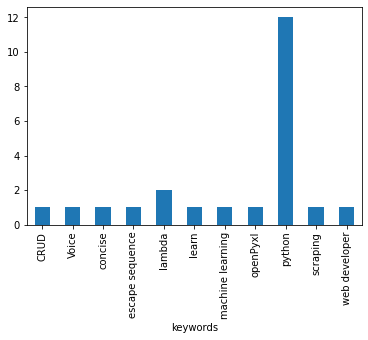

In [10]:
flattenedData.groupby('keywords').keywords.count().plot.bar()

In [8]:
# get percentages of instances where keywords are mentioned
flattenedData['keywords'].value_counts(normalize=True)

python              0.521739
lambda              0.086957
scraping            0.043478
openPyxl            0.043478
machine learning    0.043478
escape sequence     0.043478
learn               0.043478
web developer       0.043478
CRUD                0.043478
Voice               0.043478
concise             0.043478
Name: keywords, dtype: float64

In [12]:
options = ['python']

results = flattenedData[flattenedData['keywords'].isin(options)]

results.head()

,_id,title,author,date_published,dek,lead_image_url,content,next_page_url,url,domain,excerpt,word_count,direction,total_pages,rendered_pages,keywords
0,1,Application Performance Monitoring AWS Lambda ...,Matt Makai,2021,NaN,https://www.fullstackpython.com/img/headers/py...,\nAmazon Web Services (AWS) Lambda is a usage-...,NaN,https://www.fullstackpython.com/blog/applicati...,fullstackpython,Learn how to use Sentry Application Performanc...,1113,ltr,1,1,python
1,2,Asynchronous Web Scraping With Python AIOHTTP,Ronnie Atuhaire,2022,NaN,https://hashnode.com/utility/r?url=https%3A%2F...,"Hey there 👋, welcome here! Having looked at As...",NaN,https://blog.octachart.com/asynchronous-web-sc...,blog.octachart.com,"Hey there 👋, welcome here! Having looked at As...",671,ltr,1,1,python
2,3,Automating Excel with Python Video Overview - ...,Not found,2022,NaN,None,"In this tutorial, I will show you an overview ...",NaN,https://www.blog.pythonlibrary.org/2022/03/29/...,www.blog.pythonlibrary.org,"In this tutorial, I will show you an overview ...",67,ltr,1,1,python
3,4,Best 15+ Machine Learning Cheat Sheets to Pin ...,Chris,2020,NaN,https://blog.finxter.com/wp-content/uploads/20...,\nThis article compiles for you the 15 best ch...,NaN,https://blog.finxter.com/machine-learning-chea...,blog.finxter.com,This article compiles for you the 15 best chea...,2907,ltr,1,1,python
4,5,Getting started with PYTHON!!! #2.2 - Escape S...,None,2021,NaN,https://hashnode.com/utility/r?url=https%3A%2F...,Soham Sarkar\n\n\nWhat escape sequence actuall...,NaN,https://sohoxic.hashnode.dev/getting-started-w...,hashnode,"Hello People, In this blog we'll talk about Wh...",2,ltr,1,1,python


<AxesSubplot:xlabel='keywords,date_published'>

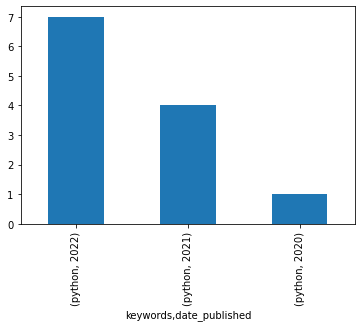

In [13]:
results.groupby('keywords')['date_published'].value_counts().plot.bar("")